# Patterns Beneath the Surface: Age Pairings, Style, and Repetition in Hollywood Films

**Project Objective:**

We selected the Hollywood Age Gap dataset to study how romantic relationship norms are repeatedly represented in mainstream cinema, where artistic expression operates alongside industry conventions and familiar storytelling patterns. This dataset is also personally meaningful to us: we are long-time admirers of classic Hollywood films, particularly the work of Marilyn Monroe and the aesthetics of vintage black-and-white cinema. Through training in unsupervised machine learning and exploratory data analysis, we are now able to move beyond purely visual interpretation and examine these films through data, uncovering structural patterns that are not immediately visible on screen.

**Dataset Description**

In this project, we utilized the **“Hollywood Age Gap”** dataset. This dataset captures romantic relationship age gaps portrayed in Hollywood films.
Each observation represents one on-screen couple within a specific movie.

**Information included:**

* Movie details (title, release year, director)
* Actor attributes (names, birthdates, ages)
* Character gender roles
* Age difference between partners
* Multiple couples may appear within the same film

**Dataset scale:**

* 1,155 couples
* Covers multiple decades of films
* Contains both actor-level and relationship-level features


## I.LOADING DATA

In [ ]:
from google.colab import data_table
from google.colab import drive

data_table.enable_dataframe_formatter()
drive.mount('/content/drive')

import pandas as pd
import numpy as np
hollywood_data = pd.read_csv('/content/age_gaps.csv')
hollywood_data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movie_name          1155 non-null   object
 1   release_year        1155 non-null   int64 
 2   director            1155 non-null   object
 3   age_difference      1155 non-null   int64 
 4   couple_number       1155 non-null   int64 
 5   actor_1_name        1155 non-null   object
 6   actor_2_name        1155 non-null   object
 7   character_1_gender  1155 non-null   object
 8   character_2_gender  1155 non-null   object
 9   actor_1_birthdate   1155 non-null   object
 10  actor_2_birthdate   1155 non-null   object
 11  actor_1_age         1155 non-null   int64 
 12  actor_2_age         1155 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 11

In [ ]:
hollywood_data.head(10)

,movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age
0,Harold and Maude,1971,Hal Ashby,52,1,Ruth Gordon,Bud Cort,woman,man,1896-10-30,1948-03-29,75,23
1,Venus,2006,Roger Michell,50,1,Peter O'Toole,Jodie Whittaker,man,woman,1932-08-02,1982-06-03,74,24
2,The Quiet American,2002,Phillip Noyce,49,1,Michael Caine,Do Thi Hai Yen,man,woman,1933-03-14,1982-10-01,69,20
3,The Big Lebowski,1998,Joel Coen,45,1,David Huddleston,Tara Reid,man,woman,1930-09-17,1975-11-08,68,23
4,Beginners,2010,Mike Mills,43,1,Christopher Plummer,Goran Visnjic,man,man,1929-12-13,1972-09-09,81,38
5,Poison Ivy,1992,Katt Shea,42,1,Tom Skerritt,Drew Barrymore,man,woman,1933-08-25,1975-02-22,59,17
6,Whatever Works,2009,Woody Allen,40,1,Larry David,Evan Rachel Wood,man,woman,1947-07-02,1987-09-07,62,22
7,Entrapment,1999,Jon Amiel,39,1,Sean Connery,Catherine Zeta-Jones,man,woman,1930-08-25,1969-09-25,69,30
8,Husbands and Wives,1992,Woody Allen,38,1,Woody Allen,Juliette Lewis,man,woman,1935-12-01,1973-06-21,57,19
9,Magnolia,1999,Paul Thomas Anderson,38,1,Jason Robards,Julianne Moore,man,woman,1922-07-26,1960-12-03,77,39


In [ ]:
import warnings
warnings.filterwarnings("ignore")

## II.EDA & INSIGHTS

### 2.1 Overview

First, we decided to examine the dataset from a macro perspective, such as the overall age gap distribution across all Hollywood films and whether this gap exhibits any temporal trends over time.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = hollywood_data.copy()

df['gap_group'] = pd.cut(
    df['age_difference'],
    bins=[0,5,10,20,40,200],
    labels=['0-5','6-10','11-20','21-40','40+'],
    include_lowest=True)

df['decade'] = (df['release_year']//10)*10

df['male_older'] = (
    ((df['character_1_gender']=='M') & (df['actor_1_age'] > df['actor_2_age'])) |
    ((df['character_2_gender']=='M') & (df['actor_2_age'] > df['actor_1_age']))
).astype(int)

**Q1.While scanning the dataset, we noticed the age differences span a large range, but most values seem clustered in smaller gaps. This made us ask whether the “diversity” is real or mainly driven by a few extreme cases.**

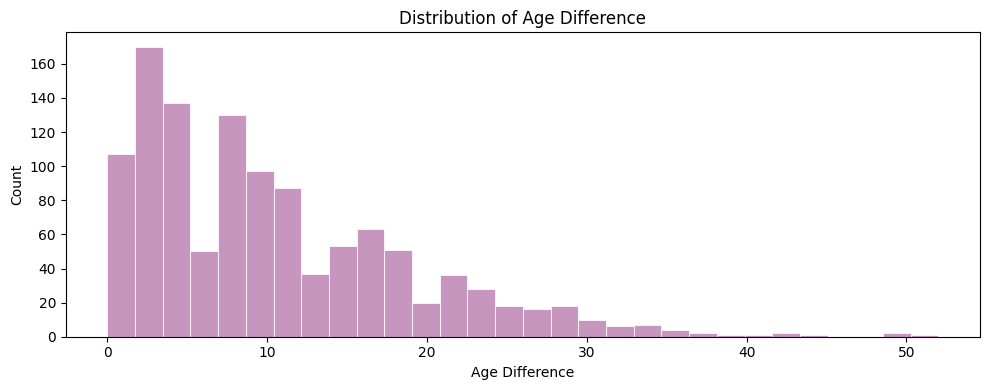

In [ ]:
plt.figure(figsize=(10,4))

plt.hist(df['age_difference'],bins=30,color='#C18BB8',edgecolor='white',linewidth=0.6,alpha=0.9)

plt.title("Distribution of Age Difference")
plt.xlabel("Age Difference")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

The histogram shows that age differences span from near 0 up to above 50 years. Most observations are concentrated in the lower ranges, especially between 0 and 15 years. As the age difference increases, the number of cases gradually decreases. The distribution is right-skewed, with fewer observations appearing at larger age gaps and a long tail extending toward higher values.


**What would be a surprise to us?**

We should be surprised to find such large age gaps (e.g., above 20 years) quite as frequent as small or medium gaps.
This would imply that Hollywood does not operate on the basis of any dominant type of relationship and that the age representation in movies is very diversified and it has no distinct pattern.

**Why this matters？**

This is one of the questions that allow us to know whether Hollywood is really diverse in terms of relationship age structures or a replica of a very small template.
Assuming that the majority of relationships are over the same age brackets, this implies that media can be bias on the fact that certain relationship patterns are normalized, but not the whole picture.
This would be significant in analyzing how the narratives in films influence social expectations of relationships in love.

**Q2.After looking at overall age gaps, we wondered if the relationship structure changes over time. This leads to the question of whether different decades show distinct age-gap patterns (period norms) rather than random variation.**

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import matplotlib.pyplot as plt

transactions = df.dropna(subset=['gap_group','decade']).apply(
    lambda r: [f"DECADE={r['decade']}", f"GAP={r['gap_group']}"],
    axis=1
).tolist()


te = TransactionEncoder()
basket = pd.DataFrame(te.fit(transactions).transform(transactions), columns=te.columns_)

freq_items = apriori(basket, min_support=0.01, use_colnames=True)

rules = association_rules(freq_items, metric="confidence", min_threshold=0.3)


decade_rules = rules[
    rules['antecedents'].apply(lambda s: any(str(x).startswith('DECADE=') for x in s)) &
    rules['consequents'].apply(lambda s: any(str(x).startswith('GAP=') for x in s))
].sort_values(['lift','confidence'], ascending=False)

print("freq_items rows =", len(freq_items))
print("rules rows =", len(rules))
print("decade_rules rows =", len(decade_rules))

decade_rules[['antecedents','consequents','support','confidence','lift']].head(10)

freq_items rows = 29
rules rows = 12
decade_rules rows = 7


,antecedents,consequents,support,confidence,lift
0,(DECADE=1950),(GAP=21-40),0.016,0.529,4.160
1,(DECADE=1960),(GAP=11-20),0.010,0.343,1.273
2,(DECADE=1980),(GAP=11-20),0.015,0.340,1.263
9,(DECADE=2010),(GAP=0-5),0.123,0.420,1.172
10,(DECADE=2010),(GAP=11-20),0.089,0.305,1.132
5,(DECADE=2000),(GAP=0-5),0.139,0.391,1.091
3,(DECADE=1990),(GAP=0-5),0.074,0.383,1.068


The table lists association rules between decades and age-gap categories.
Some decades show higher confidence values for certain gap groups, meaning those age-gap types appear relatively more often within those decades.
Lift values above 1 indicate that the co-occurrence between a decade and a specific age-gap group is stronger than random expectation.

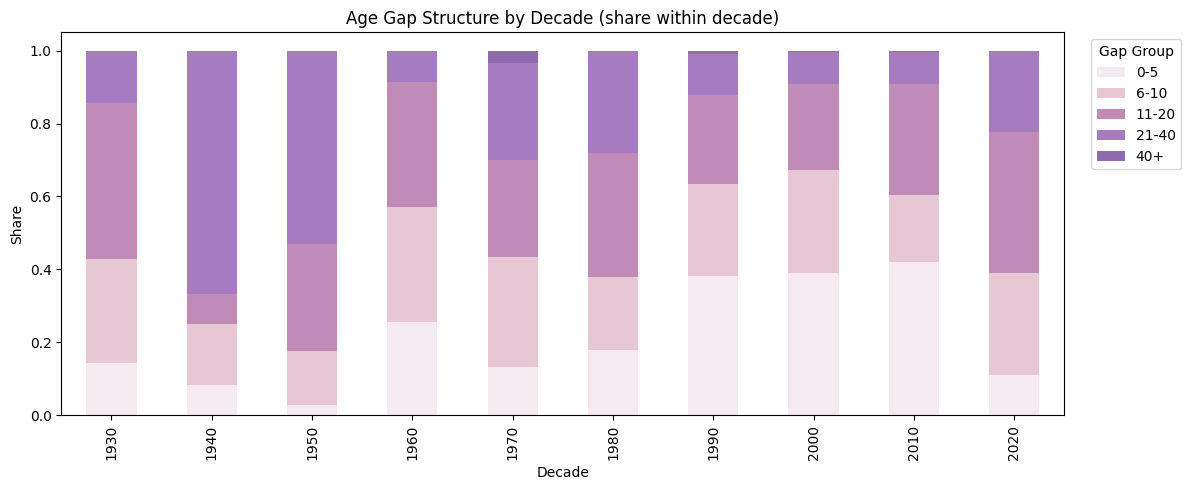

In [ ]:
colors = ['#F4EAF0', '#E6C7D3', '#C18BB8', '#A77BBF', '#8F6AAE', '#7E5A9B','#5F3F78'   ]
decade_gap_distribution = ct2.copy()
decade_gap_distribution.plot(
    kind='bar',
    stacked=True,
    figsize=(12,5),
    color=colors
)

plt.title("Age Gap Structure by Decade (share within decade)")
plt.ylabel("Share")
plt.xlabel("Decade")
plt.legend(title="Gap Group", bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()

This stacked bar chart shows the proportion of different age-gap groups within each decade.
Earlier decades contain a higher share of medium-to-large age gaps (especially 21–40 years).
In more recent decades, the share of small age gaps (0–5 and 6–10 years) becomes larger.
The composition of age-gap categories varies across decades rather than remaining constant.


**what would surprise us?**

It would be unexpected to find that the age-gap composition would be nearly the same in all decades.
It would imply that structures of relationships in movies are the same as they were in the past and do not change with society or culture.

**Why this matters?**

In case age-gap patterns vary with decade, this indicates that film narratives are subject to historical background and changing social standards.
It shows that media structure of relationships is not arbitrary, but rather it is constructed in accordance with the values of every era.
This links the analysis of films to the wider cultural transformation as opposed to viewing movies as solitary creations.

### 2.2 How Directors Differ in Relationship Age-Gap Styles


After that, we try to explore differences in directors' aesthetic preferences (age_difference).Because we want to know whether the director's aesthetic preferences have influenced the outcome. Therefore, we have reorganized the table by director and film and added a column for the number of films.

In [ ]:
hollywood_data.groupby('director').size().sort_values(ascending=False)

,0
director,
Woody Allen,20
John Glen,15
Martin Scorsese,13
Steven Spielberg,10
Mike Newell,10
...,...
Yann Samuell,1
Alan Parker,1
Zach Braff,1


In [ ]:
director_counts = hollywood_data['director'].value_counts()
hollywood_data['director_movie_count'] = hollywood_data['director'].map(director_counts)
hollywood_sorted=hollywood_data.sort_values('director_movie_count', ascending=False)

hollywood_sorted.head(10)

,movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age,director_movie_count
6,Whatever Works,2009,Woody Allen,40,1,Larry David,Evan Rachel Wood,man,woman,1947-07-02,1987-09-07,62,22,20
292,Hollywood Ending,2002,Woody Allen,15,2,Treat Williams,Tea Leoni,man,woman,1951-12-01,1966-02-25,51,36,20
8,Husbands and Wives,1992,Woody Allen,38,1,Woody Allen,Juliette Lewis,man,woman,1935-12-01,1973-06-21,57,19,20
588,Manhattan,1979,Woody Allen,8,2,Michael Murphy,Diane Keaton,man,woman,1938-05-05,1946-01-05,41,33,20
272,Scoop,2006,Woody Allen,16,1,Hugh Jackman,Scarlett Johansson,man,woman,1968-10-12,1984-11-22,38,22,20
322,Irrational Man,2015,Woody Allen,14,1,Joaquin Phoenix,Emma Stone,man,woman,1974-10-28,1988-11-06,41,27,20
876,Whatever Works,2009,Woody Allen,4,3,Henry Cavill,Evan Rachel Wood,man,woman,1983-05-05,1987-09-07,26,22,20
54,Magic in the Moonlight,2014,Woody Allen,28,1,Colin Firth,Emma Stone,man,woman,1960-09-10,1988-11-06,54,26,20
629,Café Society,2016,Woody Allen,7,2,Jesse Eisenberg,Kristen Stewart,man,woman,1983-10-05,1990-04-09,33,26,20
136,Husbands and Wives,1992,Woody Allen,21,2,Sydney Pollack,Judy Davis,man,woman,1934-07-01,1955-04-23,58,37,20


**Q3.When we broke the data down by director, we saw that some directors appear more frequently and may repeat similar relationship patterns. This motivates asking whether certain directors consistently show specific age-gap structures.**

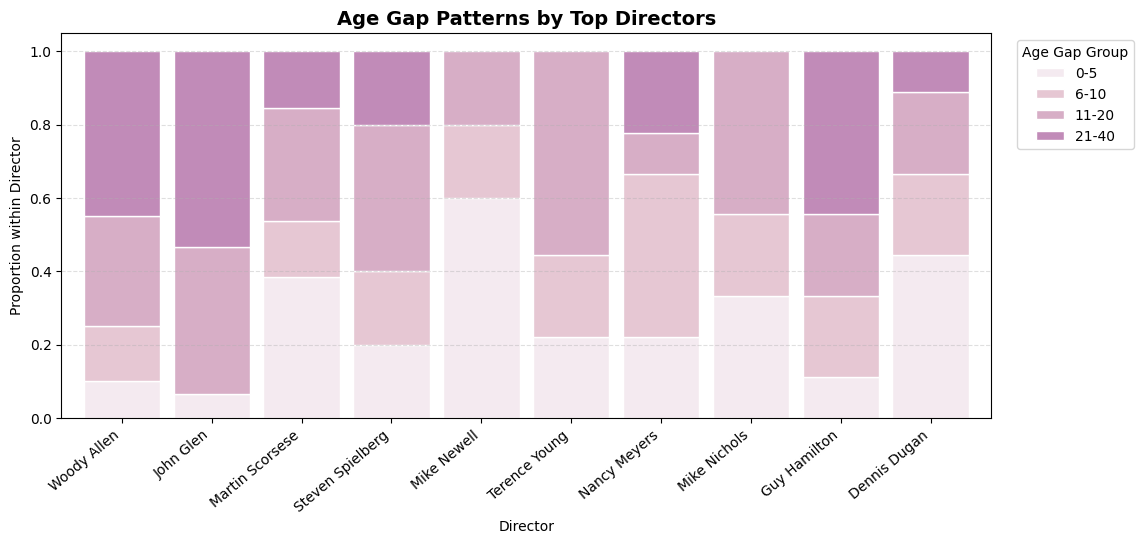

In [ ]:
TOP_N_DIRECTORS = 10

top_director_list = df['director'].value_counts().head(TOP_N_DIRECTORS).index

director_agegap_distribution = pd.crosstab(
    df[df['director'].isin(top_director_list)]['director'],
    df[df['director'].isin(top_director_list)]['gap_group'],
    normalize='index'
).loc[top_director_list]

agegap_colors = ['#F4EAF0', '#E6C7D3', '#D7AEC6', '#C18BB8', '#A77BBF', '#8F6AAE', '#7E5A9B', '#5F3F78']

fig_ax = director_agegap_distribution.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 5),
    color=agegap_colors,
    edgecolor='white',
    width=0.85
)

fig_ax.set_title("Age Gap Patterns by Top Directors", fontsize=14, weight='bold')
fig_ax.set_ylabel("Proportion within Director")
fig_ax.set_xlabel("Director")
plt.xticks(rotation=40, ha='right')
plt.legend(title="Age Gap Group", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.4)

The age gap distribution is not uniform amongst the directors. There are strong tendencies of large age differences of some directors, and also age-similar relationships are more common. This indicates that age gap structures do not indicate the random casting but director preferences on the narrative or aesthetic value of certain casts.


There are concentrated relational structures of some directors (one age-gap group prevails) and balanced compositions (another level of narrative diversity), which means that some directors have higher levels of narrative diversity than others do.

**What result would surprise us?**

It would be a miracle to find that the age-gap distributions were practically the same in all the films of the directors.
It would mean that the casting patterns are predominantly industry-based and depend not on the individual creative style.

**Why this matters?**

When directors display habitual inclinations in the age-gap settings, this indicates that the depiction of relationships is included in their storytelling style.
It implies that age representation is a social phenomenon, as well as a creative decision.
This can make us view directors as creating relationship norms by the act of telling stories and not merely mirroring the existing patterns.

**Q4.From the director-level summary, it seemed directors differ on multiple dimensions (average gap, extreme-gap share, and gender–age structure). This motivates grouping directors into “style types” based on these relationship features.**

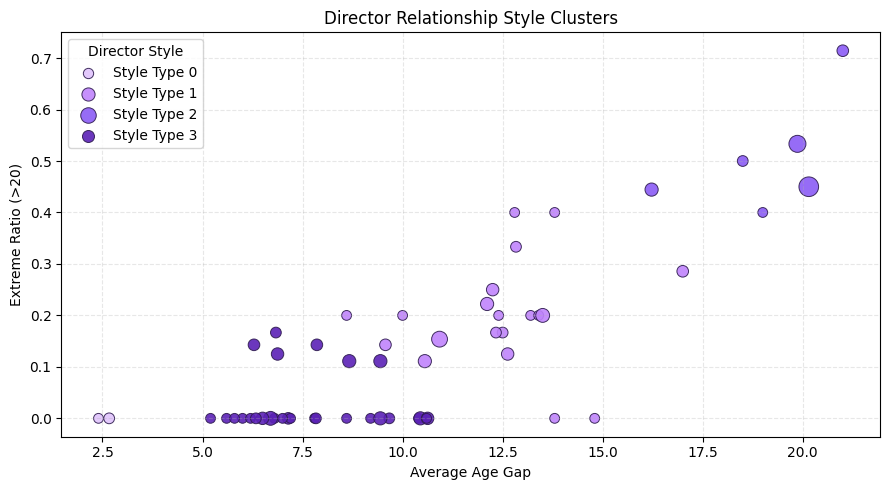

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

director_feature_matrix = g2[['avg_gap', 'extreme_ratio', 'male_older_rate']]
scaled_director_features = StandardScaler().fit_transform(director_feature_matrix)

director_style_model = KMeans(n_clusters=4, random_state=0)
g2['director_style_cluster'] = director_style_model.fit_predict(scaled_director_features)

plt.figure(figsize=(9, 5))

style_palette = ['#E0C3FC', '#C084FC', '#8B5CF6', '#5B21B6']

for cluster_id in sorted(g2['director_style_cluster'].unique()):
    cluster_subset = g2[g2['director_style_cluster'] == cluster_id]
    plt.scatter(
        cluster_subset['avg_gap'],
        cluster_subset['extreme_ratio'],
        s=cluster_subset['n'] * 10,
        color=style_palette[cluster_id],
        label=f'Style Type {cluster_id}',
        alpha=0.9,
        edgecolors='#2D1B4E',
        linewidth=0.7
    )

plt.xlabel("Average Age Gap")
plt.ylabel("Extreme Ratio (>20)")
plt.title("Director Relationship Style Clusters")
plt.legend(title="Director Style")
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

Directors can indeed be grouped into distinct “style types.” Some consistently portray age-similar relationships (low gap, low extreme use), others adopt a balanced structure, while a small group repeatedly uses large age differences as a core narrative element. This shows that relationship age structure reflects director-level storytelling style, not random casting.

**What result would surprise us?**

It would be a wonder should not clustering break out directors in large groups, and all the directors should resemble a single mixed cluster.
It would mean that there are no existing types of relationships styles and no age-gap peculiarities are involved in the structures.

**Why this matters**

This proves that the relationship age structure is a subset of larger storytelling tactics by the fact that it is possible to cluster directors into style clusters.
It is the systematic differences in how the directors develop romantic relationships.
This takes the analysis out of the reach of descriptive analysis into the identification of organized forms of narrative in film.
